# Salary_hike -> Build a prediction model for Salary_hike


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
salery =pd.read_csv('E:DATA SETS/Salary_Data.csv')
salery.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salery.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

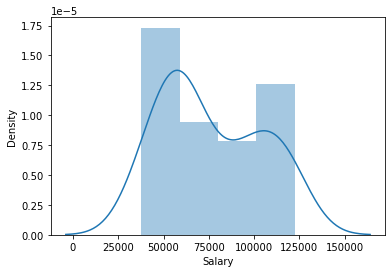

In [5]:
sns.distplot(salery['Salary'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

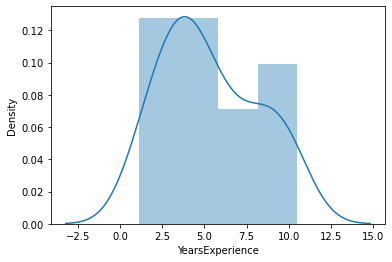

In [6]:
sns.distplot(salery['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

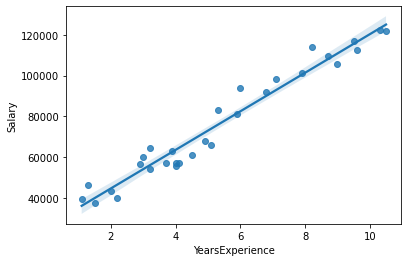

In [7]:
model=smf.ols("Salary~YearsExperience", data= salery).fit()
sns.regplot(x='YearsExperience',y='Salary',data= salery)

<AxesSubplot:ylabel='YearsExperience'>

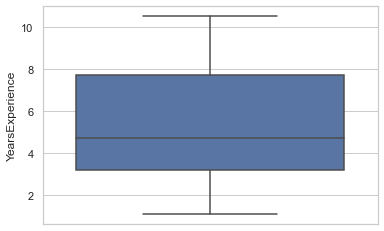

In [8]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=salery["YearsExperience"])

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [12]:
newdata=pd.Series([43254,2])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
model.predict(data_pred)

0    4.087745e+08
1    4.469212e+04
dtype: float64

# Using log 

In [13]:
x = np.log(salery['YearsExperience'])
y=salery['Salary']

In [14]:
salery1= pd.concat([y,x],axis=1)

In [15]:
salery1

,Salary,YearsExperience
0,39343.0,0.095310
1,46205.0,0.262364
2,37731.0,0.405465
3,43525.0,0.693147
4,39891.0,0.788457
5,56642.0,1.064711
6,60150.0,1.098612
7,54445.0,1.163151
8,64445.0,1.163151
9,57189.0,1.308333


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

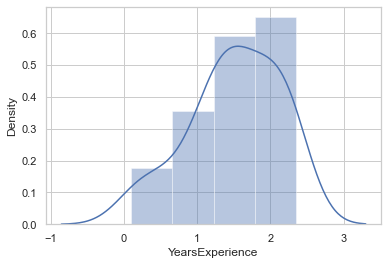

In [16]:
sns.distplot(salery1['YearsExperience'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

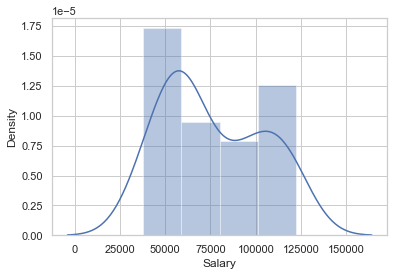

In [17]:
sns.distplot(salery1['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

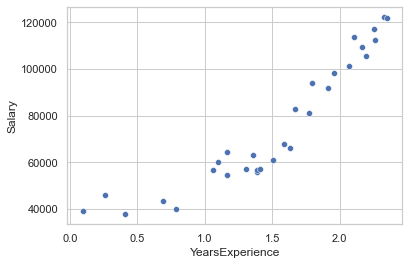

In [18]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salery1)

<AxesSubplot:ylabel='YearsExperience'>

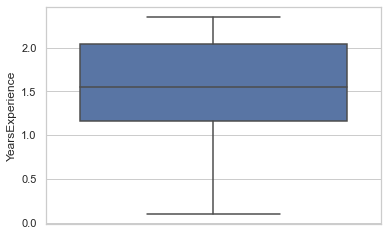

In [19]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=salery1["YearsExperience"])

In [20]:
model2=smf.ols("Salary~YearsExperience", data= salery1).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

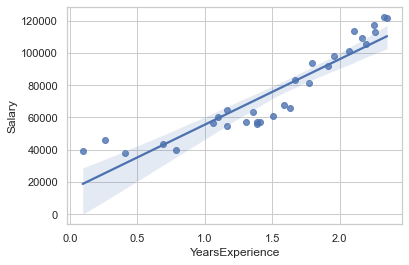

In [21]:
sns.regplot(x='YearsExperience',y='Salary',data= salery1)

In [22]:
model2.params

Intercept          14927.97177
YearsExperience    40581.98796
dtype: float64

In [23]:
(model2.tvalues,model2.pvalues)

(Intercept           2.895135
 YearsExperience    12.791989
 dtype: float64,
 Intercept          7.268813e-03
 YearsExperience    3.250155e-13
 dtype: float64)

In [24]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

# USING SQRT

In [25]:
x1 = np.sqrt(salery['YearsExperience'])
y1 = salery['Salary']

In [26]:
salery2= pd.concat([y1,x1],axis=1)

In [27]:
salery2.corr()

,Salary,YearsExperience
Salary,1.000000,0.964884
YearsExperience,0.964884,1.000000


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

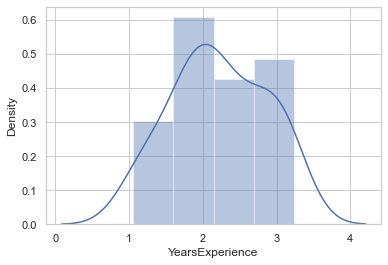

In [28]:
sns.distplot(salery2['YearsExperience'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

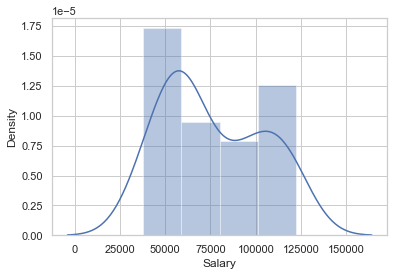

In [29]:
sns.distplot(salery2['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

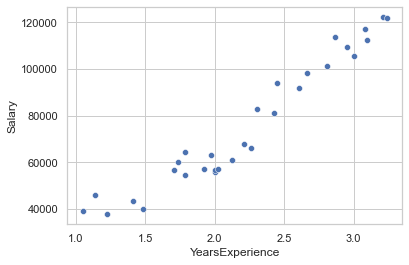

In [30]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salery2)

<AxesSubplot:ylabel='YearsExperience'>

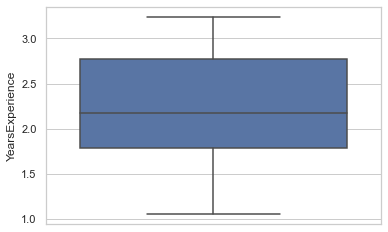

In [31]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=salery2["YearsExperience"])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

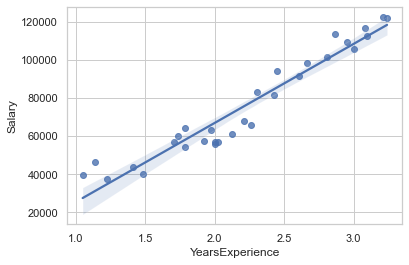

In [32]:
sns.regplot(x='YearsExperience',y='Salary',data= salery2)

In [33]:
model3=smf.ols("Salary~YearsExperience", data= salery2).fit()

In [34]:
model3.params

Intercept         -16055.769117
YearsExperience    41500.680583
dtype: float64

In [35]:
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept          -3.262308
YearsExperience    19.437148
dtype: float64 
 Intercept          2.906965e-03
YearsExperience    8.565358e-18
dtype: float64


(0.9310009544993526, 0.9285367028743294)

# USING BoxCox tranformation

In [36]:
from scipy.stats import boxcox
x3,_= boxcox(salery['YearsExperience'])
y3 = salery['Salary']

In [37]:
x3=pd.Series(x3,dtype=float,name='YearsExperience')

In [38]:
salery3

NameError: name 'salery3' is not defined

In [39]:
salery3=pd.concat([y3,x3],axis=1)

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

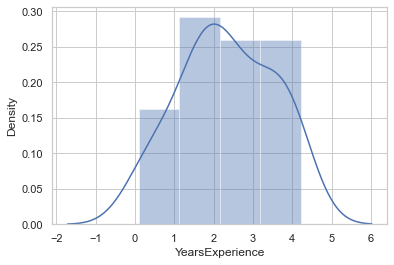

In [40]:
sns.distplot(salery3['YearsExperience'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

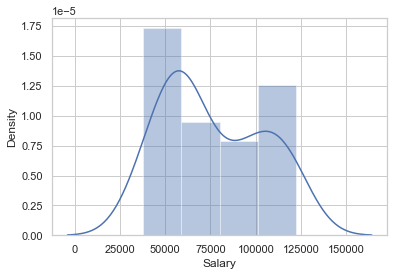

In [41]:
sns.distplot(salery3['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

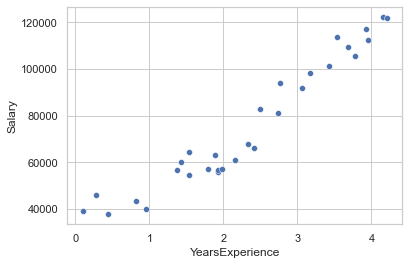

In [42]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salery3)

<AxesSubplot:ylabel='YearsExperience'>

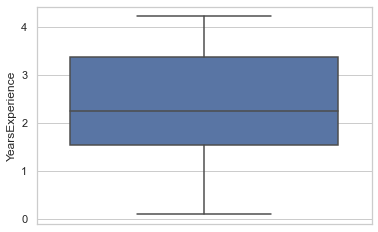

In [43]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=salery3["YearsExperience"])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

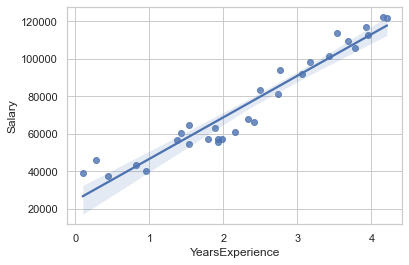

In [44]:
sns.regplot(x='YearsExperience',y='Salary',data= salery3)

In [45]:
model4=smf.ols("Salary~YearsExperience", data= salery3).fit()

In [46]:
model4.params

Intercept          24502.090749
YearsExperience    22148.886915
dtype: float64

In [48]:
print(model4.tvalues,'\n',model4.pvalues)
(model4.rsquared,model4.rsquared_adj)

Intercept           7.970817
YearsExperience    18.759229
dtype: float64 
 Intercept          1.110863e-08
YearsExperience    2.161063e-17
dtype: float64


(0.9262980775606598, 0.9236658660449691)

# Accuracy by all models

In [49]:
print(model.tvalues,'\n',model.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


(0.9569566641435086, 0.9554194021486339)

In [50]:
print(model2.tvalues,'\n',model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept           2.895135
YearsExperience    12.791989
dtype: float64 
 Intercept          7.268813e-03
YearsExperience    3.250155e-13
dtype: float64


(0.8538888828756969, 0.8486706286926861)

In [51]:
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept          -3.262308
YearsExperience    19.437148
dtype: float64 
 Intercept          2.906965e-03
YearsExperience    8.565358e-18
dtype: float64


(0.9310009544993526, 0.9285367028743294)

In [52]:
print(model4.tvalues,'\n',model4.pvalues)
(model4.rsquared,model4.rsquared_adj)

Intercept           7.970817
YearsExperience    18.759229
dtype: float64 
 Intercept          1.110863e-08
YearsExperience    2.161063e-17
dtype: float64


(0.9262980775606598, 0.9236658660449691)

# THE END

#  Delivery_time -> Predict delivery time using sorting time 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [54]:
data =pd.read_csv('E:DATA SETS/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [56]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

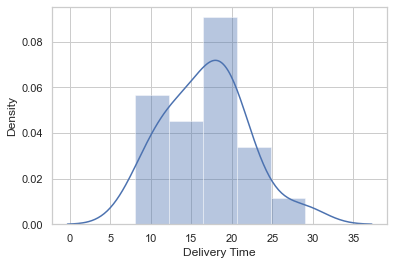

In [57]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

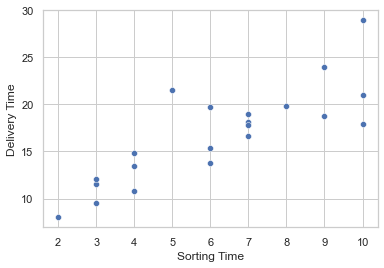

In [58]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=data)

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

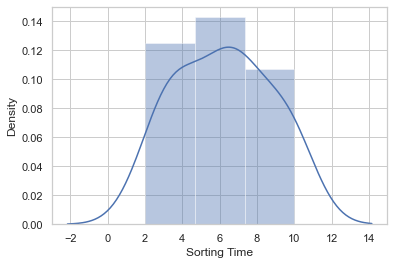

In [59]:
sns.distplot(data['Sorting Time'])

In [60]:
deli=pd.Series(data.iloc[:,0])
sort=pd.Series(data.iloc[:,1])
model=smf.ols("sort~deli",data=data).fit()


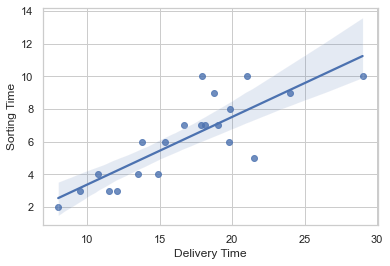

In [61]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=data);

In [63]:
model.params

Intercept   -0.756673
deli         0.413744
dtype: float64

In [64]:
print(model.tvalues,'\n',model.pvalues)

Intercept   -0.667290
deli         6.387447
dtype: float64 
 Intercept    0.512611
deli         0.000004
dtype: float64


In [65]:
(model.rsquared_adj,model.rsquared)

(0.6655489208860244, 0.6822714748417231)

In [66]:
newdata=pd.Series([26,8])
data_pred=pd.DataFrame(newdata,columns=['deli'])
model.predict(data_pred)

0    10.000661
1     2.553276
dtype: float64

# Using Log Module

In [67]:
data1 = data.copy()

In [68]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [69]:
data1.rename(columns = {'Delivery Time':'Delivery','Sorting Time':'Sorting'}, inplace = True)

In [70]:
data1

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [71]:
x = np.log(data1['Sorting'])
y=data1['Delivery']

In [72]:
data2= pd.concat([y,x],axis=1)

In [73]:
data2

,Delivery,Sorting
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585
5,15.35,1.791759
6,19.00,1.945910
7,9.50,1.098612
8,17.90,2.302585
9,18.75,2.197225


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

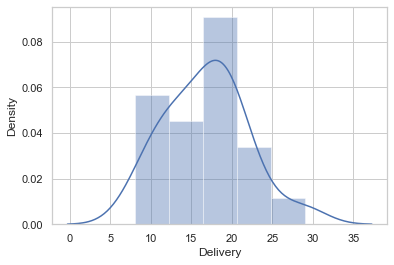

In [74]:
sns.distplot(data2['Delivery'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

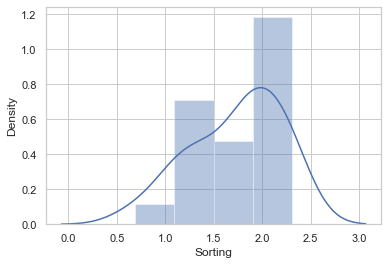

In [75]:
sns.distplot(data2['Sorting'])

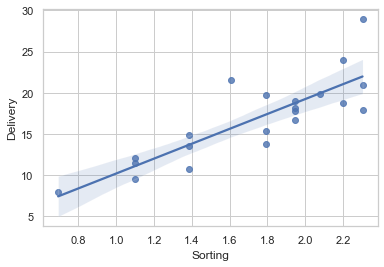

In [79]:
sns.regplot(x="Sorting",y="Delivery",data=data2);

In [80]:
model1 = smf.ols("Delivery~Sorting",data = data2).fit()

<AxesSubplot:ylabel='Delivery'>

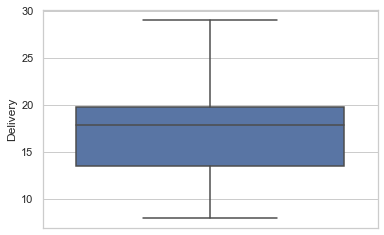

In [81]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data2["Delivery"])

In [82]:
model1.params

Intercept    1.159684
Sorting      9.043413
dtype: float64

In [83]:
print(model1.tvalues,'\n',model.pvalues)

Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.512611
deli         0.000004
dtype: float64


In [84]:
(model1.rsquared,model1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# Using SQRT

In [85]:
x1 = np.sqrt(data1['Sorting'])
y1 = data1['Delivery']

In [86]:
data3= pd.concat([y1,x1],axis=1)

In [87]:
data3.corr()

,Delivery,Sorting
Delivery,1.00000,0.83415
Sorting,0.83415,1.00000


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

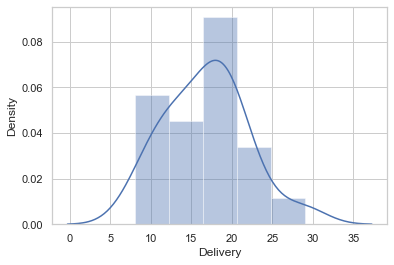

In [88]:
sns.distplot(data3['Delivery'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

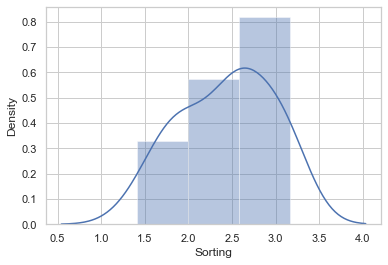

In [89]:
sns.distplot(data3['Sorting'])

In [90]:
model2 = smf.ols("Delivery~Sorting",data = data1).fit()

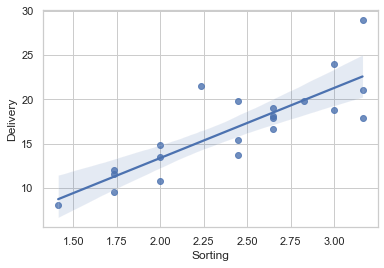

In [93]:
sns.regplot(x="Sorting",y="Delivery",data=data3);

<AxesSubplot:ylabel='Delivery'>

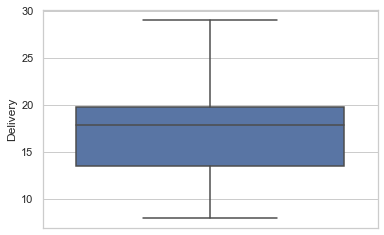

In [94]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data3["Delivery"])

In [95]:
model2.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [96]:
print(model2.tvalues,'\n',model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

# USing BoxCox transformation 

In [97]:
from scipy.stats import boxcox
x3,_= boxcox(data1['Sorting'])
y3 = data1['Delivery']

In [98]:
x3=pd.Series(x3,dtype=float,name='Sorting')

In [99]:
data4=pd.concat([y3,x3],axis=1)

In [100]:
data4.head()

,Delivery,Sorting
0,21.00,5.719365
1,13.50,2.338756
2,19.75,3.573250
3,24.00,5.211954
4,29.00,5.719365


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

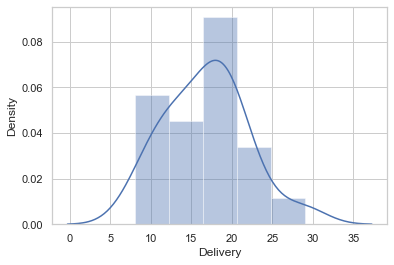

In [101]:
sns.distplot(data4['Delivery'])

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

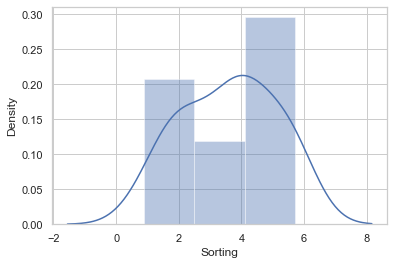

In [102]:
sns.distplot(data4['Sorting'])

In [103]:
model3 = smf.ols("Delivery~Sorting",data = data2).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

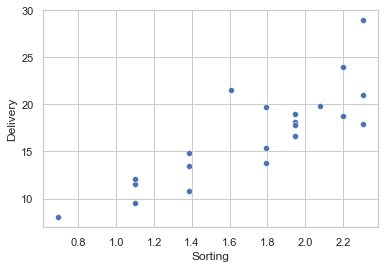

In [104]:
sns.scatterplot(x='Sorting',y='Delivery',data=data2)

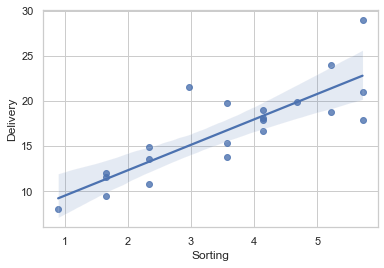

In [107]:
sns.regplot(x="Sorting",y="Delivery",data=data4);

<AxesSubplot:ylabel='Delivery'>

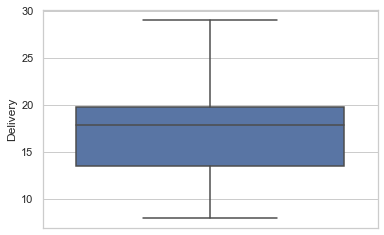

In [108]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data4["Delivery"])

In [109]:
model3.params

Intercept    1.159684
Sorting      9.043413
dtype: float64

In [110]:
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.641980
Sorting      0.000003
dtype: float64


(0.6954434611324223, 0.6794141696130761)

# Accuracy by all method

In [111]:
print(model.params)
print(model.tvalues,'\n',model.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept   -0.756673
deli         0.413744
dtype: float64
Intercept   -0.667290
deli         6.387447
dtype: float64 
 Intercept    0.512611
deli         0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

In [112]:
print(model1.params)
print(model1.tvalues,'\n',model1.pvalues)
(model1.rsquared,model1.rsquared_adj)

Intercept    1.159684
Sorting      9.043413
dtype: float64
Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.641980
Sorting      0.000003
dtype: float64


(0.6954434611324223, 0.6794141696130761)

In [113]:
print(model2.params)
print(model2.tvalues,'\n',model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept    6.582734
Sorting      1.649020
dtype: float64
Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

In [114]:
print(model3.params)
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept    1.159684
Sorting      9.043413
dtype: float64
Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.641980
Sorting      0.000003
dtype: float64


(0.6954434611324223, 0.6794141696130761)

# The END